# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [193]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_key import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [194]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [34]:
# Create a series of scatter plots to showcase the following relationships
# Temperature (F) vs. Latitude
# Humidity (%) vs. Latitude
# Cloudiness (%) vs. Latitude
# Wind Speed (mph) vs. Latitude

# declare list variables to hold data
city_list = []
lat_list = []
lng_list = []
maxtemp_list = []
humidity_list = []
cloudiness_list = []
windspeed_list = []
country_list = []
date_list = []

# set API base url
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q="

print("Beginning Data Retrieval")
print("------------------------")

row = 1
set_count = 1
for city in cities:
    try:
        res = requests.get(url + city).json()
        city_list.append(res['name'])
        lat_list.append(res['coord']['lat'])
        lng_list.append(res['coord']['lon'])
        maxtemp_list.append(res['main']['temp_max'])
        humidity_list.append(res["main"]["humidity"])
        cloudiness_list.append(res["clouds"]["all"])
        windspeed_list.append(res["wind"]["speed"])
        country_list.append(res["sys"]["country"])
        date_list.append(res["dt"])
        
        print(f"Processing Record {row} of Set {set_count} : {city}")
        
        row += 1
        if(row == 50):
            row = 1
            set_count += 1
        
    except:
        print("Failed, skipping..")


print("------------------------")
print("Data Retrieval Complete")



Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 : tuktoyaktuk
Processing Record 2 of Set 1 : barrow
Processing Record 3 of Set 1 : centralia
Failed, skipping..
Processing Record 4 of Set 1 : poum
Processing Record 5 of Set 1 : cape town
Processing Record 6 of Set 1 : katsuura
Processing Record 7 of Set 1 : geraldton
Processing Record 8 of Set 1 : arraial do cabo
Processing Record 9 of Set 1 : east london
Processing Record 10 of Set 1 : havre-saint-pierre
Failed, skipping..
Processing Record 11 of Set 1 : kapaa
Processing Record 12 of Set 1 : hamilton
Processing Record 13 of Set 1 : alice springs
Processing Record 14 of Set 1 : pochutla
Failed, skipping..
Processing Record 15 of Set 1 : nenjiang
Processing Record 16 of Set 1 : puerto ayora
Processing Record 17 of Set 1 : punta arenas
Processing Record 18 of Set 1 : fairbanks
Processing Record 19 of Set 1 : sechura
Processing Record 20 of Set 1 : hualmay
Processing Record 21 of Set 1 : port alfred
Processin

Processing Record 45 of Set 4 : pangnirtung
Processing Record 46 of Set 4 : changji
Processing Record 47 of Set 4 : sibolga
Processing Record 48 of Set 4 : salamiyah
Processing Record 49 of Set 4 : jasdan
Processing Record 1 of Set 5 : mareeba
Processing Record 2 of Set 5 : khatanga
Processing Record 3 of Set 5 : roebourne
Processing Record 4 of Set 5 : namatanai
Processing Record 5 of Set 5 : bredasdorp
Processing Record 6 of Set 5 : labis
Processing Record 7 of Set 5 : sisian
Processing Record 8 of Set 5 : kloulklubed
Processing Record 9 of Set 5 : kinwat
Processing Record 10 of Set 5 : tadine
Failed, skipping..
Processing Record 11 of Set 5 : carnarvon
Processing Record 12 of Set 5 : kavieng
Processing Record 13 of Set 5 : jutai
Processing Record 14 of Set 5 : avera
Processing Record 15 of Set 5 : margate
Processing Record 16 of Set 5 : tiarei
Processing Record 17 of Set 5 : goma
Processing Record 18 of Set 5 : dorchester
Processing Record 19 of Set 5 : alekseyevka
Processing Record

Processing Record 43 of Set 8 : alofi
Processing Record 44 of Set 8 : orapa
Processing Record 45 of Set 8 : pisco
Processing Record 46 of Set 8 : berezniki
Processing Record 47 of Set 8 : kavaratti
Processing Record 48 of Set 8 : mangan
Processing Record 49 of Set 8 : forbes
Processing Record 1 of Set 9 : tongzi
Processing Record 2 of Set 9 : cockburn town
Processing Record 3 of Set 9 : ewa beach
Processing Record 4 of Set 9 : calvia
Processing Record 5 of Set 9 : severo-yeniseyskiy
Processing Record 6 of Set 9 : kawalu
Processing Record 7 of Set 9 : burns lake
Processing Record 8 of Set 9 : te anau
Processing Record 9 of Set 9 : henties bay
Processing Record 10 of Set 9 : okhotsk
Processing Record 11 of Set 9 : thinadhoo
Processing Record 12 of Set 9 : sadiqabad
Processing Record 13 of Set 9 : toguchin
Processing Record 14 of Set 9 : nuuk
Processing Record 15 of Set 9 : san cristobal
Processing Record 16 of Set 9 : riviere-au-renard
Processing Record 17 of Set 9 : manzhouli
Failed, sk

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [80]:
weather_df = pd.DataFrame({
    "City" : city_list,
    "Lat" : lat_list,
    "Lng" : lng_list,
    "Max Temp" : maxtemp_list,
    "Humidity" : humidity_list,
    "Cloudiness" : cloudiness_list,
    "Wind Speed" : windspeed_list,
    "Country" : country_list,
    "Date" : date_list          
})

weather_df.head()
print(len(weather_df.index))
weather_df.to_csv("output/city_weather_data.csv", index = False)

563


In [60]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,5.630000e+02
mean,19.922807,18.668526,294.447638,67.280639,58.307282,3.330568,1.623506e+09
std,32.498986,91.944234,8.798725,23.249600,38.966402,2.366203,1.103494e+02
min,-54.800000,-179.166700,271.700000,3.000000,0.000000,0.000000,1.623505e+09
25%,-7.013900,-65.407400,288.240000,55.000000,20.000000,1.495000,1.623506e+09
50%,22.788600,22.200000,295.910000,73.000000,71.000000,2.910000,1.623506e+09
75%,46.551100,100.713250,300.230000,84.500000,99.000000,4.610000,1.623506e+09
max,78.218600,179.316700,319.250000,100.000000,100.000000,14.260000,1.623506e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [61]:
h_df = weather_df.loc[weather_df['Humidity'] > 100]
len(h_df.index)

0

In [195]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
def get_outlier(df=None, column=None, weight=1.5):
  quantile_25 = np.percentile(df[column].values, 25)
  quantile_75 = np.percentile(df[column].values, 75)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*weight
  
  lowest = quantile_25 - IQR_weight
  highest = quantile_75 + IQR_weight
  
  outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ]
  return outlier_idx

outlier_idx = get_outlier(df=weather_df, column='Humidity', weight=1.5)
clean_city_data = weather_df.drop(outlier_idx, axis=0, inplace=False)

len(clean_city_data.index)

557

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot
This plot displays relationship between Latitude vs Max Temperature

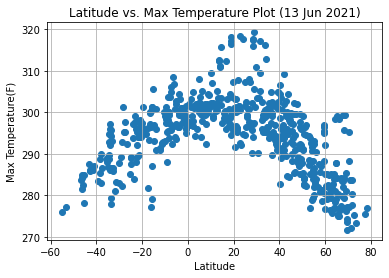

In [196]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Max Temp'], marker = "o")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.title('Latitude vs. Max Temperature Plot (13 Jun 2021)')
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.savefig("output/lat_vs_max.png")

plt.show()

## Latitude vs. Humidity Plot
This plot displays relationship between Latitude vs Humidity

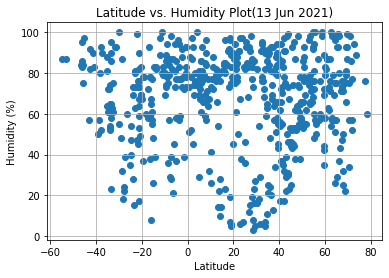

In [197]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity'], marker = 'o')

# Add labels and title to plot
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title('Latitude vs. Humidity Plot(13 Jun 2021)')
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.savefig("output/lat_vs_humidity_plot.png")

plt.show()

## Latitude vs. Cloudiness Plot
This plot displays relationship between Latitude vs Cloudiness

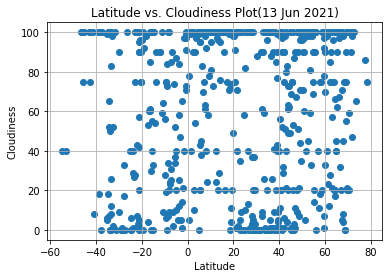

In [198]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness'], marker = 'o')

# Add labels and title to plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title('Latitude vs. Cloudiness Plot(13 Jun 2021)')
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.savefig("output/lat_vs_cloudiness_plot.png")

plt.show()

## Latitude vs. Wind Speed Plot
This plot displays relationship between Latitude vs Wind Speed

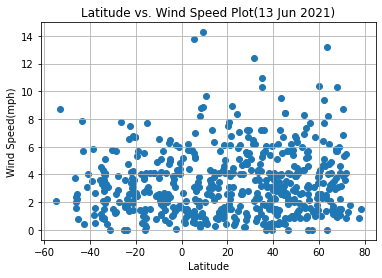

In [199]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'], marker = 'o')

# Add labels and title to plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title('Latitude vs. Wind Speed Plot(13 Jun 2021)')
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.savefig("output/lat_vs_windspeed_plot.png")

plt.show()

## Linear Regression

In [200]:
# set cities in northern and southern hemisphere
northern_df = clean_city_data.loc[clean_city_data["Lat"] > 0]
southern_df = clean_city_data.loc[clean_city_data["Lat"] < 0]
xlable = "Latitude"

print(len(northern_df.index))
print(len(southern_df.index))

# set a function so we can re-use for each
def run_linear_regress(x_values, y_values, title, xlable, ylabel, x_ann, y_ann):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    print(f"The r-value is: {rvalue}")
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values, marker = 'o', facecolors="blue")
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_ann, y_ann),fontsize=15, color="red")
    plt.xlabel(xlable)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

390
167


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.7165431261758138


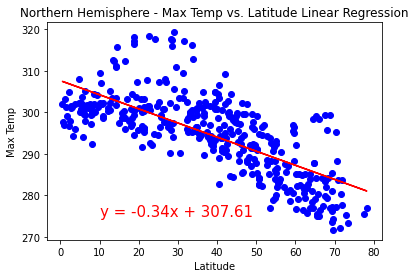

In [201]:
ylabel = "Max Temp"
title = "Northern Hemisphere - Max Temp vs. Latitude Linear Regression"
plt.savefig("output/northern_hemisphere_maxtemp_latitude_linear_regression.png")
run_linear_regress(northern_df["Lat"],northern_df[ylabel],title, xlable,ylabel, 10, 275)


This plot shows that there is a negative linear relationship between Max Temp and Latitude. The closer the city's latitude towards the Equator, the hotter the temperature is.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7076394175812386


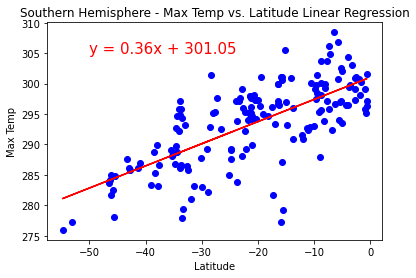

In [202]:
ylabel = "Max Temp"
title = "Southern Hemisphere - Max Temp vs. Latitude Linear Regression"
plt.savefig("output/southern_hemisphere_maxtemp_latitude_linear_regression.png")
run_linear_regress(southern_df["Lat"],southern_df[ylabel],title, xlable,ylabel, -50, 305)

This plot shows that there is a positive linear relationship between Max Temp and Latitude. The closer the city's latitude towards the Equator, the hotter the temperature is.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.012938141879546394


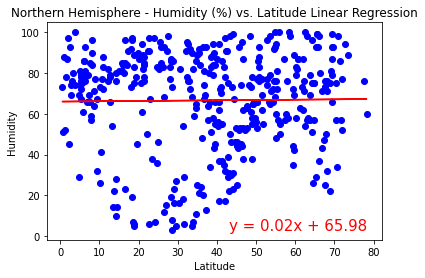

In [203]:
ylabel = "Humidity"
title = "Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression"
plt.savefig("output/northern_hemisphere_humidity_latitude_linear_regression.png")
run_linear_regress(northern_df["Lat"],northern_df[ylabel],title, xlable,ylabel, 43, 3)

This plots shows the relationship between humidity vs Latitude in Northern Hemisphere, a lot less points were showing around the linear equation that indicates less correlation between the two factors.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.003406288201230315


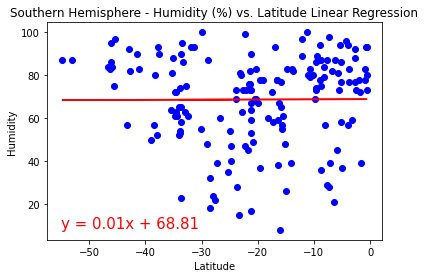

In [204]:
ylabel = "Humidity"
title = "Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression"
plt.savefig("output/souhern_hemisphere_humidity_latitude_linear_regression.png")
run_linear_regress(southern_df["Lat"],southern_df[ylabel],title, xlable,ylabel, -55, 9)

This plots shows the relationship between humidity vs Latitude in Southern Hemisphere, less points are showing around the linear equation that indicates less correlation between the two factors.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.04758122906683786


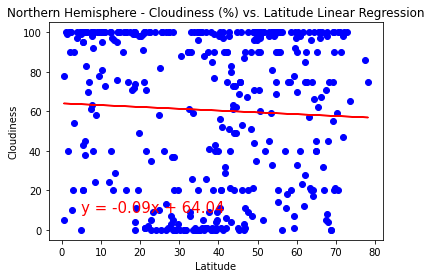

In [205]:
ylabel = "Cloudiness"
title = "Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression"
plt.savefig("output/northern_hemisphere_cloudiness_latitude_linear_regression.png")
run_linear_regress(northern_df["Lat"],northern_df[ylabel],title, xlable,ylabel, 5, 9)

This plots shows the relationship between cloudiness vs. Latitude in Northern Hemisphere. less points are showing around the linear equation that indicates less correlation between the two factors.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.0894699886170408


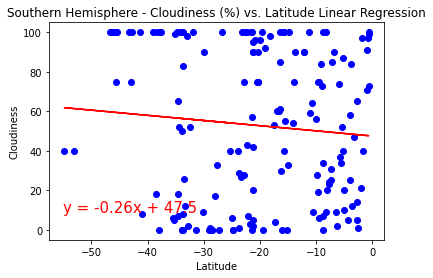

In [206]:
ylabel = "Cloudiness"
title = "Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression"
plt.savefig("output/southern_hemisphere_cloudiness_latitude_linear_regression.png")
run_linear_regress(southern_df["Lat"],southern_df[ylabel],title, xlable,ylabel, -55, 9)

This plots shows the relationship between cloudiness vs. Latitude in Southern Hemisphere. less points are showing around the linear equation that indicates less correlation between the two factors.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.03751845114016131


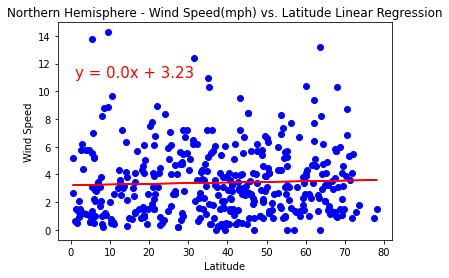

In [207]:
ylabel = "Wind Speed"
title = "Northern Hemisphere - Wind Speed(mph) vs. Latitude Linear Regression"
plt.savefig("output/northern_hemisphere_windspeed_latitude_linear_regression.png")
run_linear_regress(northern_df["Lat"],northern_df[ylabel],title, xlable,ylabel,1, 11)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.01125483630284363


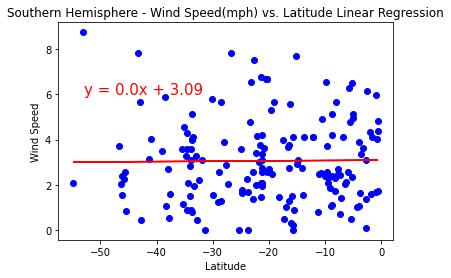

In [208]:
ylabel = "Wind Speed"
title = "Southern Hemisphere - Wind Speed(mph) vs. Latitude Linear Regression"
plt.savefig("output/southern_hemisphere_windspeed_latitude_linear_regression.png")
run_linear_regress(southern_df["Lat"],southern_df[ylabel],title, xlable,ylabel,-53, 6)